https://course.fast.ai/Lessons/lesson5.html

In [3]:

from pathlib import Path

path = Path('titanic')

In [4]:
import torch, numpy as np, pandas as pd

np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [25]:
df = pd.read_csv(path / 'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [27]:
df.fillna(modes, inplace=True)

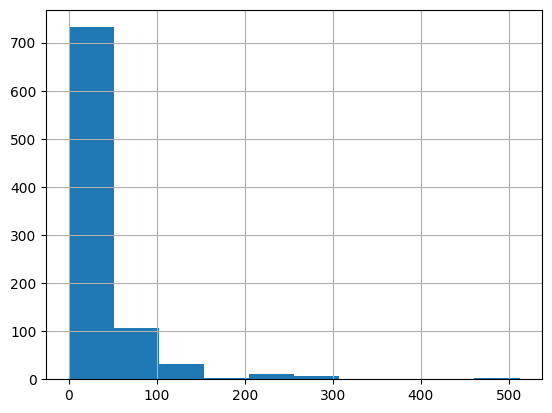

In [28]:
df['Fare'].hist();


In [29]:
df['LogFare'] = np.log(df['Fare'] + 1)

<Axes: >

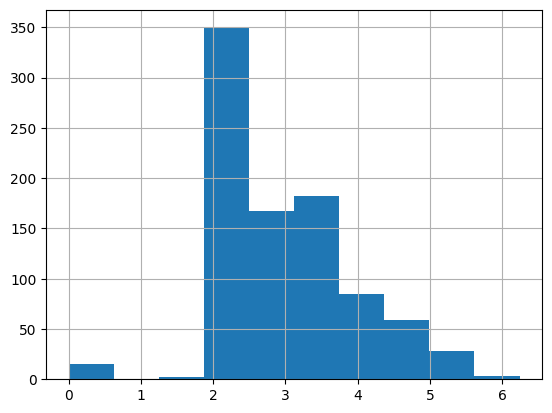

In [11]:
df['LogFare'].hist()

In [12]:
df.describe(include=[object])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,B96 B98,S
freq,1,577,7,691,646


In [30]:
df = pd.get_dummies(df, columns=["Sex", "Pclass", "Embarked"], dtype='float')

In [31]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [54]:
from torch import tensor

t_dep = tensor(df.Survived)

In [34]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols
t_indep = tensor(df[indep_cols].values, dtype=torch.float)


In [35]:
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [36]:
torch.manual_seed(442)
n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff) - 0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [37]:
vals, indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [38]:
t_indep * coeffs


tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [39]:
preds = (t_indep * coeffs).sum(axis=1)


In [40]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(0.5382)

In [41]:
def calc_preds(coeffs, indeps): return (indeps * coeffs).sum(axis=1)

def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps) - deps).mean()

In [42]:
coeffs.requires_grad_()


tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [43]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

In [44]:
loss.backward()

In [45]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.5043)


In [46]:
from fastai.data.transforms import RandomSplitter

trn_split, val_split = RandomSplitter(seed=42)(df)

In [47]:
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]
len(trn_indep), len(val_indep)

(713, 178)

In [51]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"loss = {loss:.3f}", end="; ")

def init_coeffs(): return (torch.rand(n_coeff) - 0.5).requires_grad_()

def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [52]:
coeffs = train_model(18, lr=0.2)


loss = 0.536; loss = 0.502; loss = 0.477; loss = 0.454; loss = 0.431; loss = 0.409; loss = 0.388; loss = 0.367; loss = 0.349; loss = 0.336; loss = 0.330; loss = 0.326; loss = 0.329; loss = 0.304; loss = 0.314; loss = 0.296; loss = 0.300; loss = 0.289; 

In [53]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))

show_coeffs()

{'Age': tensor(-0.2694),
 'SibSp': tensor(0.0901),
 'Parch': tensor(0.2359),
 'LogFare': tensor(0.0280),
 'Sex_male': tensor(-0.3990),
 'Sex_female': tensor(0.2345),
 'Pclass_1': tensor(0.7232),
 'Pclass_2': tensor(0.4112),
 'Pclass_3': tensor(0.3601),
 'Embarked_C': tensor(0.0955),
 'Embarked_Q': tensor(0.2395),
 'Embarked_S': tensor(0.2122)}

In [56]:
preds = calc_preds(coeffs, val_indep)
results = val_dep.bool() == (preds > 0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [ ]:
def acc(coeffs): return (val_dep.bool() == (calc_preds(coeffs, val_indep) > 0.5)).float().mean()

acc(coeffs)

In [59]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps @ coeffs)


In [60]:
coeffs = train_model(lr=100)


loss = 0.510; loss = 0.327; loss = 0.294; loss = 0.207; loss = 0.201; loss = 0.199; loss = 0.198; loss = 0.197; loss = 0.196; loss = 0.196; loss = 0.196; loss = 0.195; loss = 0.195; loss = 0.195; loss = 0.195; loss = 0.195; loss = 0.195; loss = 0.195; loss = 0.194; loss = 0.194; loss = 0.194; loss = 0.194; loss = 0.194; loss = 0.194; loss = 0.194; loss = 0.194; loss = 0.194; loss = 0.194; loss = 0.194; loss = 0.194; 

In [61]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden) - 0.5) / n_hidden
    layer2 = torch.rand(n_hidden, 1) - 0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [62]:


def calc_preds(coeffs, indeps):
    l1, l2, const = coeffs
    res = F.relu(indeps @ l1)
    res = res @ l2 + const
    return torch.sigmoid(res)

In [63]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [67]:
coeffs = train_model(lr=1.4)

def acc(coeffs): return (val_dep.bool() == (calc_preds(coeffs, val_indep) > 0.5)).float().mean()


loss = 0.544; loss = 0.538; loss = 0.532; loss = 0.526; loss = 0.519; loss = 0.512; loss = 0.504; loss = 0.495; loss = 0.486; loss = 0.476; loss = 0.465; loss = 0.455; loss = 0.444; loss = 0.434; loss = 0.426; loss = 0.418; loss = 0.412; loss = 0.407; loss = 0.403; loss = 0.400; loss = 0.397; loss = 0.395; loss = 0.393; loss = 0.391; loss = 0.390; loss = 0.389; loss = 0.388; loss = 0.387; loss = 0.387; loss = 0.386; 

In [69]:
coeffs = train_model(lr=20)


loss = 0.544; loss = 0.464; loss = 0.388; loss = 0.382; loss = 0.381; loss = 0.380; loss = 0.380; loss = 0.380; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; loss = 0.379; 

In [70]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden) - 0.5) / n_hidden
    layer2 = torch.rand(n_hidden, 1) - 0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [71]:


def calc_preds(coeffs, indeps):
    l1, l2, const = coeffs
    res = F.relu(indeps @ l1)
    res = res @ l2 + const
    return torch.sigmoid(res)

In [72]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [75]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i + 1]) - 0.3) / sizes[i + 1] * 4 for i in range(n - 1)]
    consts = [(torch.rand(1)[0] - 0.5) * 0.1 for i in range(n - 1)]
    for l in layers + consts: l.requires_grad_()
    return layers, consts

In [76]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers, consts = coeffs
    n = len(layers)
    res = indeps
    for i, l in enumerate(layers):
        res = res @ l + consts[i]
        if i != n - 1: res = F.relu(res)
    return torch.sigmoid(res)

In [77]:
def update_coeffs(coeffs, lr):
    layers, consts = coeffs
    for layer in layers + consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [78]:
coeffs = train_model(lr=4)


loss = 0.531; loss = 0.484; loss = 0.470; loss = 0.457; loss = 0.447; loss = 0.437; loss = 0.430; loss = 0.424; loss = 0.419; loss = 0.414; loss = 0.411; loss = 0.408; loss = 0.405; loss = 0.403; loss = 0.401; loss = 0.400; loss = 0.398; loss = 0.397; loss = 0.396; loss = 0.395; loss = 0.394; loss = 0.393; loss = 0.392; loss = 0.392; loss = 0.391; loss = 0.391; loss = 0.390; loss = 0.390; loss = 0.389; loss = 0.389; 

In [79]:
acc(coeffs)


tensor(0.5955)